# 2. Imaging Inspection

This notebook provides an example usage how to perform imaging inspection.

In [2]:
%matplotlib inline
from smili import uvdata,imdata,util
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import IFrame

In [3]:
# Load the UVFITS and FITS for a sample image
image    = imdata.IMFITS("3C273_image.fits")
uvfits   = uvdata.UVFITS("3C273DEC16.UVP").select_stokes("I")

# Table objects of visibilities
vtable = uvfits.make_vistable() # Complex Visibilities
btable = vtable.make_bstable()  # Bispectra
ctable = vtable.make_catable()  # Log closure amplitudes

Filename: 3C273DEC16.UVP
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 GroupsHDU      155   (3, 4, 1, 4, 1, 1)   float32   1913 Groups  7 Parameters
  1  AIPS NX       1 BinTableHDU     31   8R x 7C   [1E, 1E, 1J, 1J, 1J, 1J, 1J]   
  2  AIPS FQ       1 BinTableHDU     29   1R x 6C   [1J, 4D, 4E, 4E, 4J, 32A]   
  3  AIPS AN       1 BinTableHDU     72   10R x 14C   [8A, 3D, 0D, 1J, 1J, 1E, 1E, 4E, 1A, 1E, 8E, 1A, 1E, 8E]   

Loading HDUs in the input UVFITS files.
  Primary HDU was loaded.
  AIPS FQ Table was loaded.
  Subarray 1 was found in an AIPS AN table

Checking loaded HDUs.
  1 Subarray settings are found.
  No AIPS SU tables were found.
    Assuming that this is a single source UVFITS file.

Reading FQ Tables
  Frequency Setup ID: 1
    IF Freq setups (Hz):
         if_freq_offset  ch_bandwidth  if_bandwidth  sideband
      0             0.0    64000000.0    64000000.0         1
      1      80000000.0    64000000.0    64000000.0         1


/Users/moriyama/anaconda2/lib/python2.7/site-packages/astropy/io/fits/fitsrec.py:690: UserWarning: Field 'ORBPARM' has a repeat count of 0 in its format code, indicating an empty field.
  'indicating an empty field.'.format(key))


  VisData.sort: 0 indexes have wrong station orders (ant1 > ant2).
  VisData.sort: Data have been sorted by utc, ant1, ant2, subarray
Stokes I data will be calculated from input RR and LL data


  1%|          | 61/7647 [00:00<00:12, 608.66it/s]

(1/5) Sort data
(2/5) Tagging data


  0%|          | 1/248 [00:00<00:29,  8.41it/s]

  Number of Tags: 248
(3/5) Checking Baseline Combinations


  0%|          | 0/248 [00:00<?, ?it/s]

  Detect 25 combinations for Closure Phases
(4/5) Forming Closure Phases


100%|██████████| 248/248 [00:42<00:00,  5.84it/s]


(5/5) Creating BSTable object
(1/5) Sort data
(2/5) Tagging data

 11%|█         | 27/248 [00:00<00:00, 222.40it/s]


  Number of Tags: 248
(3/5) Checking Baseline Combinations


  0%|          | 0/248 [00:00<?, ?it/s]

  Detect 25 combinations for Closure Amplitudes
(4/5) Forming Closure Amplitudes


100%|██████████| 248/248 [00:47<00:00,  5.20it/s]


(5/5) Creating CATable object


## 2.1 Image inspections based on model images

You can compare observational visibilities and model image by adapting following functions:

1. "eval_image" returns a model visibilities which is Fourier coefficient of the intensity of the image.
2. "residual_image" calculates the residual between real and model visibilities. 
3. "chisq_image" estimates the a (mean square) standardized residual, $\chi$ ($\chi_{\rm r}$). 

These functions can be adapted to complex visibilities, bispectra, and log closure amplitudes. 

### 2.2.1 Modeling complex visibilities

Here, we show an example for modeling complex visibilities.

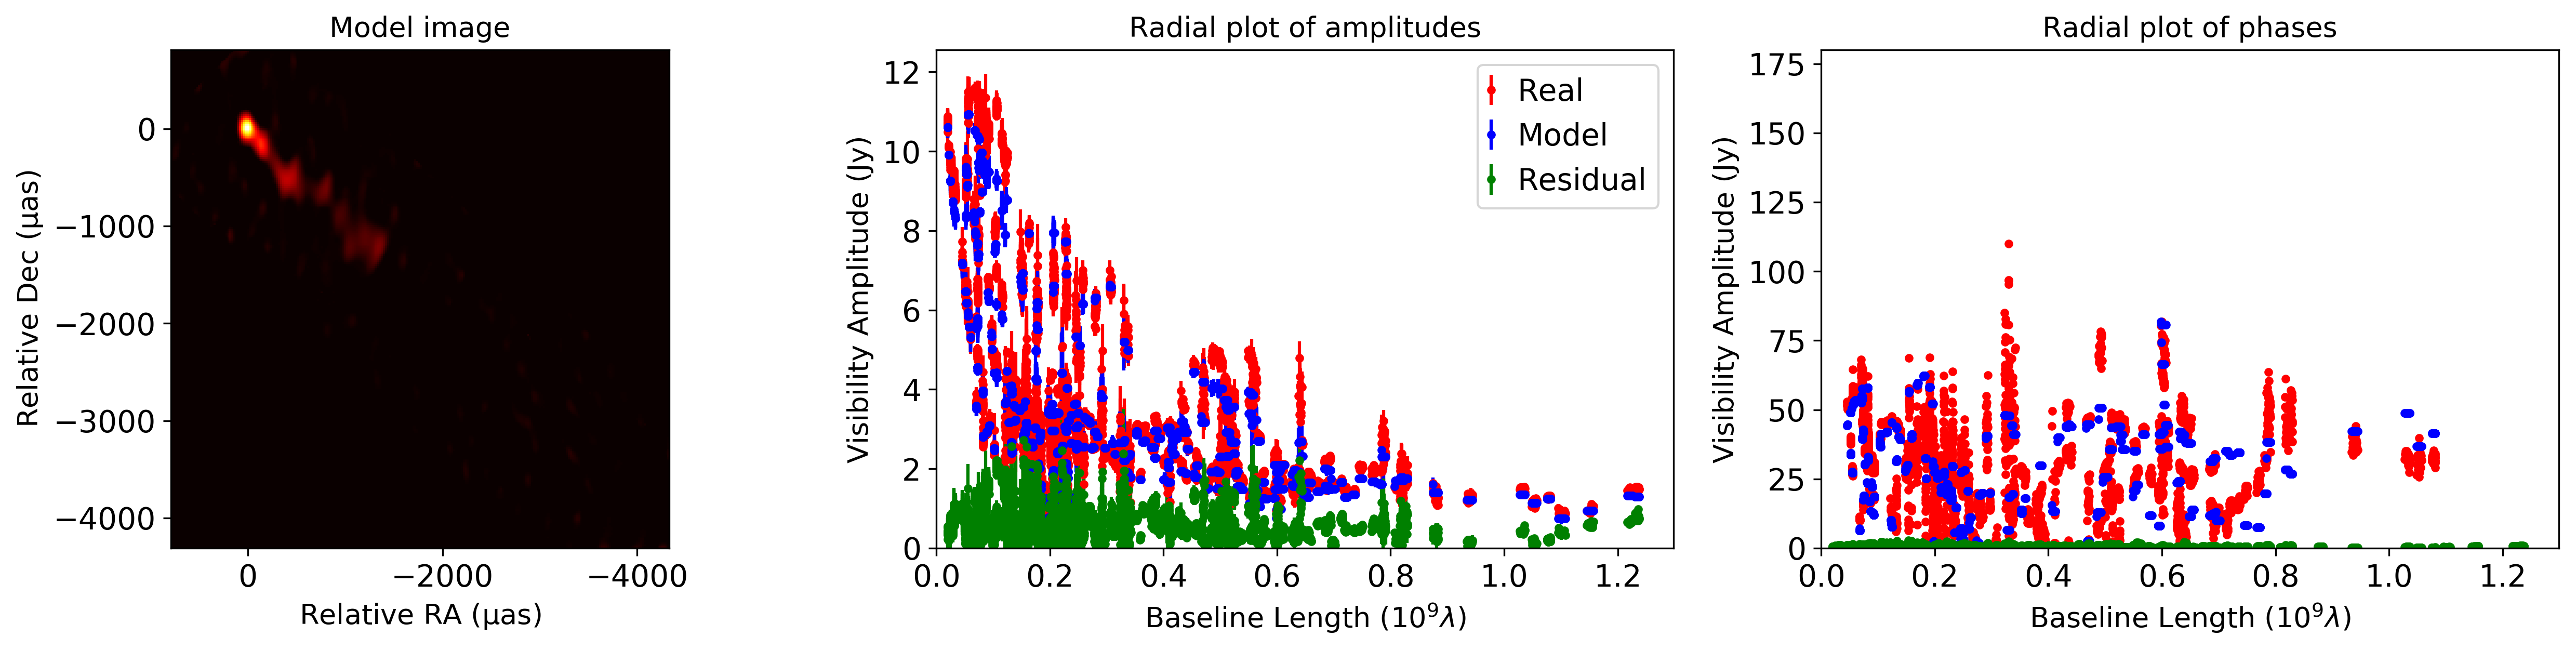

Complex visibilities  : standard and mean square residuals are 436957.52 and 28.57.
Visibility amplitudes : standard and mean square residuals are 143705.12 and 18.79.


In [9]:
# model complex visibilities based on an input image
vtable_model = vtable.eval_image(image)

# residual between real and model visibilities
vtable_residual = vtable.residual_image(image)

# You can also check the visibilies as a function of projected baseline length
util.matplotlibrc(ncols=3, width=500, height=300)
fig, axs = plt.subplots(ncols=3)

plt.sca(axs[0])
plt.title("Model image")
image.imshow(cmap=cm.hot)

plt.sca(axs[1])
plt.title("Radial plot of amplitudes")
vtable.radplot(datatype="amp",label="Real",color="red")
vtable_model.radplot(datatype="amp",label="Model",color="blue")
vtable_residual.radplot(datatype="amp",label="Residual",color="green")
plt.legend(loc='upper right',markerscale=1.,handlelength=0.1)

plt.sca(axs[2])
plt.title("Radial plot of phases")
vtable.radplot(datatype="phase",label="Real",color="red")
vtable_model.radplot(datatype="phase",label="Model",color="blue")
vtable_residual.radplot(datatype="amp",label="Residual",color="green")
plt.show()

# You can estimate the a (mean square) standardized residual.
print("Complex visibilities  : standard and mean square residuals are %1.2f and %1.2f."%(vtable.chisq_image(image)))
print("Visibility amplitudes : standard and mean square residuals are %1.2f and %1.2f."%(vtable.chisq_image(image,amptable=True)))

### 2.1.2 Modeling closure values

You can also adapt the functions to bispectra and log closure amplitudes.

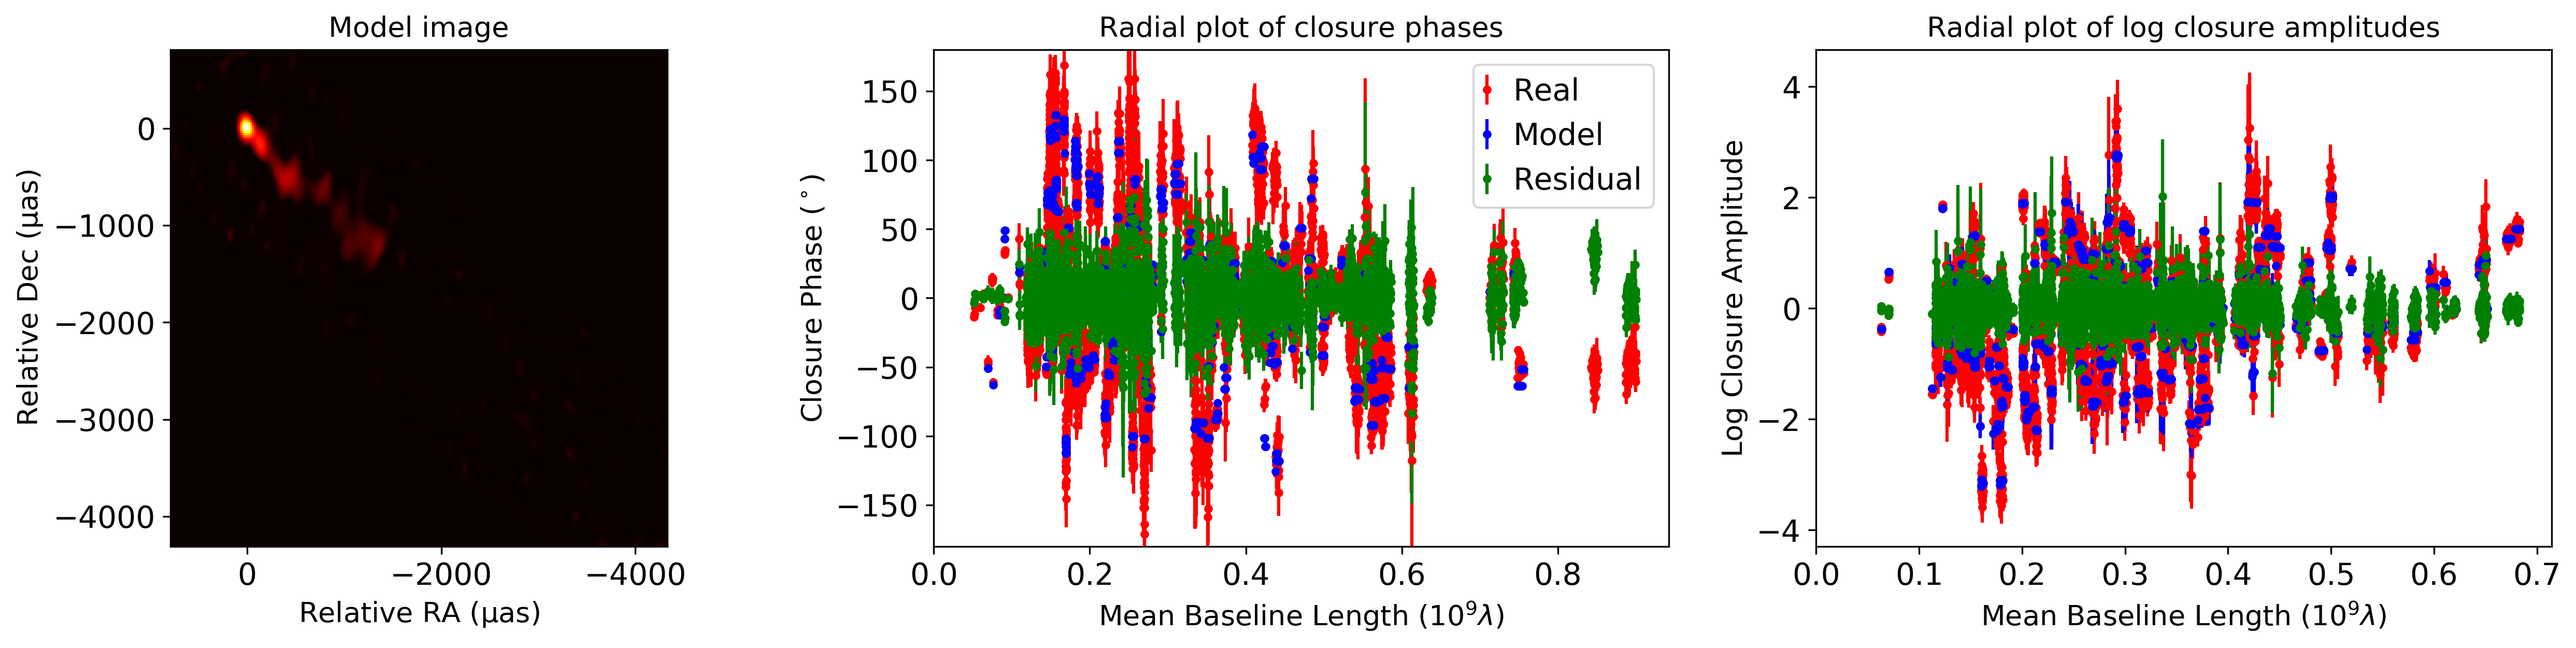

Closure phases        : Standard and mean square residuals are 12129.23 and 2.07.
Log closure amplitudes: Standard and mean square residuals are 5796.75 and 1.03.


In [8]:
# model bispectra based on an input image
btable_model = btable.eval_image(image)

# residual between real and model bispectra
btable_residual = btable.residual_image(image)

# model log closure amplitudes based on an input image
ctable_model = ctable.eval_image(image)

# residual between real and model bispectra
ctable_residual = ctable.residual_image(image)

# You can also check the visibilities as a function of projected baseline length
util.matplotlibrc(ncols=3, width=500, height=300)
fig, axs = plt.subplots(ncols=3)

plt.sca(axs[0])
plt.title("Model image")
image.imshow(cmap=cm.hot)

plt.sca(axs[1])
plt.title("Radial plot of closure phases")
btable.radplot(label="Real",color="red")
btable_model.radplot(label="Model",color="blue")
btable_residual.radplot(label="Residual",color="green")
plt.legend(loc='upper right',markerscale=1.,handlelength=0.1)

plt.sca(axs[2])
plt.title("Radial plot of log closure amplitudes")
ctable.radplot(label="Real",color="red")
ctable_model.radplot(label="Model",color="blue")
ctable_residual.radplot(label="Residual",color="green")
plt.show()

# You can estimate the a (mean square) standardized residual.
print("Closure phases        : Standard and mean square residuals are %1.2f and %1.2f."%(btable.chisq_image(image)))
print("Log closure amplitudes: Standard and mean square residuals are %1.2f and %1.2f."%(ctable.chisq_image(image)))

## 2.2 plot model functions

You can make summary pdf figures and csv file of checking model, residual
and chisquare for visibilities and model image regarding each baseline. 
Here, you can see the summary plots for following calculations.

In [6]:
# You can make a summary plot for image inspections.

# Complex visibilities
vtable.plot_model_fcv(image,filename="plot_model_fcv.pdf")

# Visibility amplitudes
vtable.plot_model_amp(image,filename="plot_model_amp.pdf")

# Closure phases
btable.plot_model(image,filename="plot_model_cphase.pdf")

# Log closure amplitudes
ctable.plot_model(image,filename="plot_model_logcamp.pdf")

/Users/moriyama/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/moriyama/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:1449: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.HourLocator'>
  str(type(self)))


## 2.3 Dirty image and residual map

You can estimate a residual map and clean image (model image+residual map) by using an observational visibilities and model image.
You can also check the Synthesized beam of model images.

(<matplotlib.image.AxesImage at 0x1c1feb5b50>,
 <matplotlib.colorbar.Colorbar at 0x1c27409e10>)

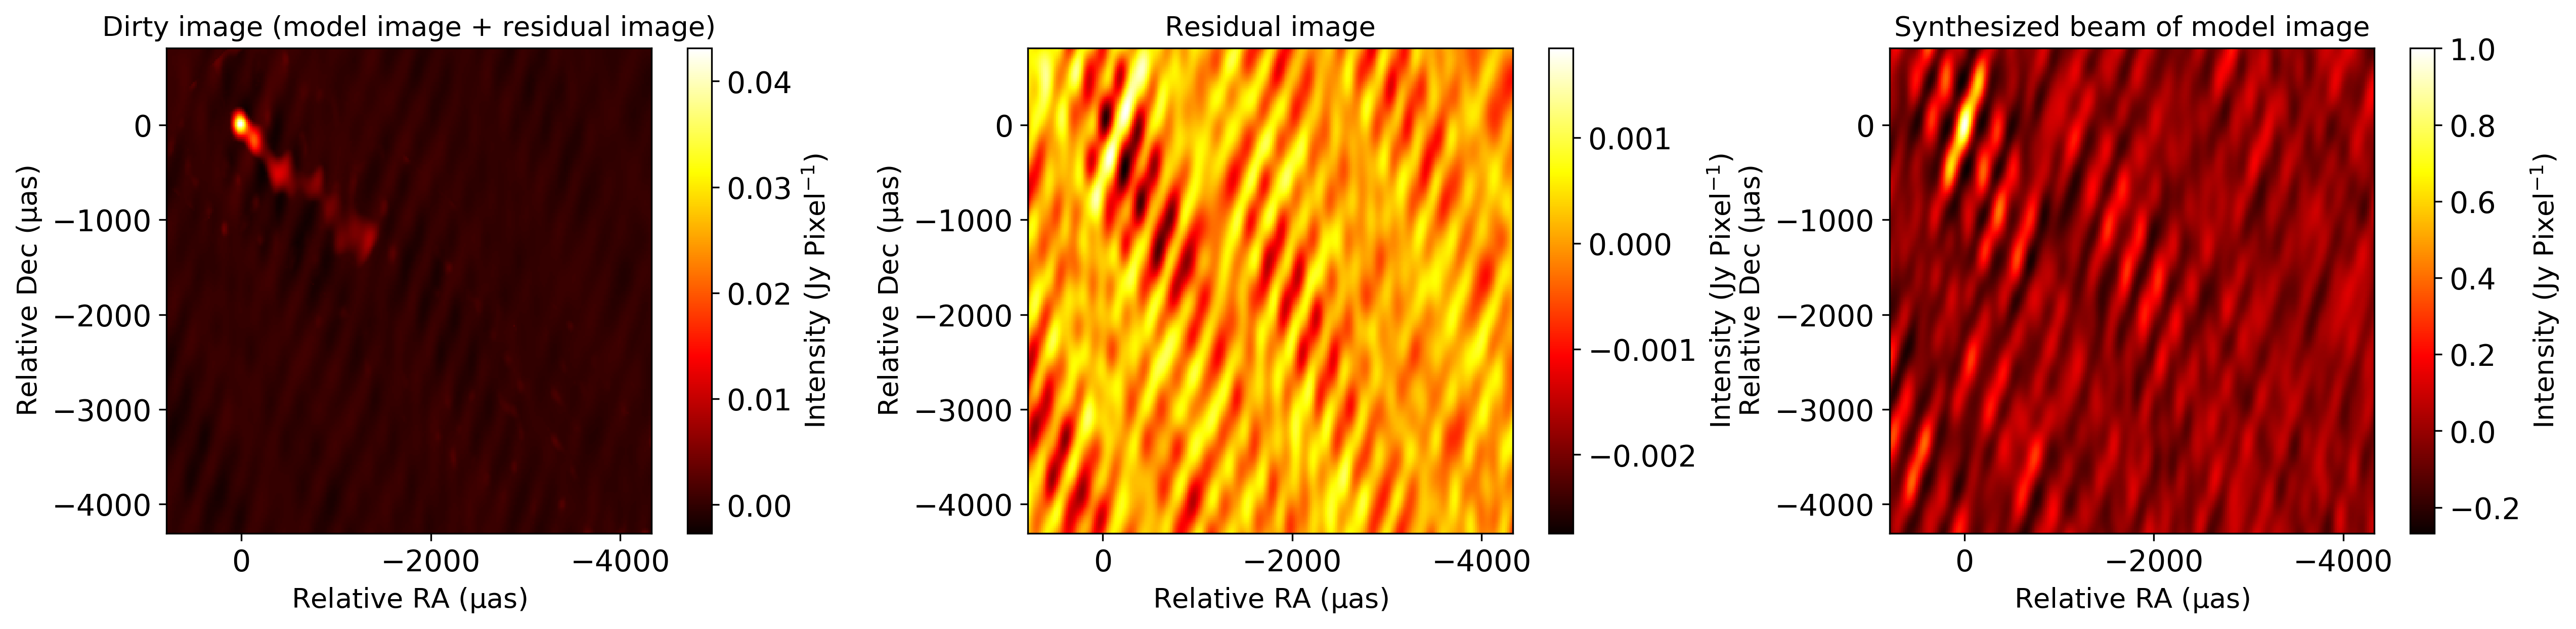

In [7]:
# Model image adding residual map
image_clean    = vtable.map_clean(image)

# Residual map based on an observational visibilities and model image
image_residual = vtable.map_residual(image)

# Synthesized beam of model image
image_sbeam = vtable.map_beam(image)


# You can also check images regarding residual map
util.matplotlibrc(ncols=3, width=500, height=300)
fig, axs = plt.subplots(ncols=3)

plt.sca(axs[0])
plt.title("Dirty image (model image + residual image)")
image_clean.imshow(cmap=cm.hot,colorbar=True)

plt.sca(axs[1])
plt.title("Residual image")
image_residual.imshow(cmap=cm.hot,colorbar=True)

plt.sca(axs[2])
plt.title("Synthesized beam of model image")
image_sbeam.imshow(cmap=cm.hot,colorbar=True)